## Занятие 6
## Математический анализ
## Дифференцирование

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import diff, solve, nsolve, solveset, latex, S, simplify, fraction
from sympy import sin as Sin
from sympy.calculus.util import continuous_domain
%matplotlib inline

## Лабораторная работа 6
## Математический анализ
## Задание 1
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот, отметить и подписать точки экстремума и точки перегиба,
включить функцию и асимптоты в легенду. 
$$
y = x^2e^{-x}
$$

Область определения функции:


Reals

Функция не периодична

Функция общего вида
Производная первого порядка:


-x**2*exp(-x) + 2*x*exp(-x)

Нули производной:


[0, 2]

Значения производной около нулей:


[-3*E, exp(-1), -3*exp(-3)]

Точки экстремума функции:


[0, 2]

Производная второго порядка:


(x**2 - 4*x + 2)*exp(-x)

Нули производной второго порядка:


[2 - sqrt(2), sqrt(2) + 2]

Значения производной второго порядка около нулей:


[(-2 + (1 - sqrt(2))**2 + 4*sqrt(2))*exp(-1 + sqrt(2)),
 -2*exp(-2),
 (-10 - 4*sqrt(2) + (sqrt(2) + 3)**2)*exp(-3 - sqrt(2))]

Точки перегиба:


[2 - sqrt(2), sqrt(2) + 2]

Вертикальные асимптоты отсутствуют

lim f(x) при x -> -oo:


oo

lim f(x) при x -> +oo:


0

Горизонтальная асимптота:
y = 0

k при x -> -oo:


-oo

k при x -> +oo:


0

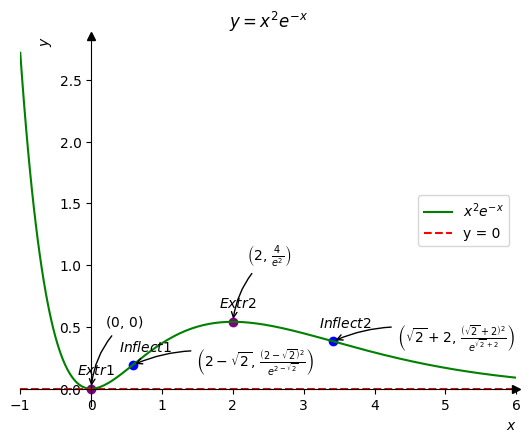

In [13]:
from sympy.abc import x
from sympy.calculus.util import periodicity


X_MIN: float; X_MAX: float


def config_ax(ax):
    global X_MIN, X_MAX
    ax.set_title("$y = x^2  e^{-x}$")
    ax.legend(loc="right")
    ax.set_xlim(X_MIN, X_MAX)
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["bottom"].set_position(("data", 0))
    ax.spines["left"].set_position(("data", 0))
    ax.set_ylabel("$y$", loc="top")
    ax.set_xlabel("$x$", loc="right")
    ax.plot(1, 0, "k>", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)


def annotate_extreme_points(extr_x, extr_y):
    plt.scatter(extr_x, extr_y, color="purple")
    for i, x0 in enumerate(extr_x):
        f0 = extr_y[i]
        plt.annotate(
            fr"$\left({latex(x0)},\,{latex(f0)}\right)$",
            xy=(x0, f0),
            xycoords="data",
            xytext=(x0 + 0.2, f0 + 0.5),
            textcoords="data",
            arrowprops={
                "arrowstyle": "->",
                "connectionstyle": "arc3,rad=.2",
            }
        )
        plt.annotate(
            f"$Extr{i + 1}$",
            xy=(x0, f0),
            xycoords="data",
            xytext=(-10, 10),
            textcoords="offset points",
            fontsize=10,
        )
    

def annotate_inflection_points(infl_x, infl_y):
    plt.scatter(infl_x, infl_y, color="blue")
    for i, x0 in enumerate(infl_x):
        f0 = infl_y[i]
        plt.annotate(
                fr"$\left({latex(x0)},\,{latex(f0)}\right)$", 
                xy=(x0, f0), 
                xycoords="data",
                xytext=(x0 + 0.9, f0), 
                textcoords="data", 
                fontsize=10,
                arrowprops={
                    "arrowstyle": "->", 
                    "connectionstyle": "arc3,rad=.2",
                })
        plt.annotate(
            f"$Inflect{i+1}$", 
            xy=(x0, f0), 
            xycoords="data",
            xytext=(-10, 10), 
            textcoords="offset points", 
            fontsize=10
        )


def f(x):
    return x*x*sympy.E**(-x)


def main():
    domain_f = continuous_domain(f(x), x, domain=S.Reals)
    print("Область определения функции:")
    display(domain_f)

    period = periodicity(f(x), x)
    if period:
        print("Периодичность функции:")
        display(period)
    else:
        print("Функция не периодична\n")

    if f(x) == f(-x):
        print("Функция чётна")
    elif f(x) == -f(-x):
        print("Функия нечётна")
    else:
        print("Функция общего вида")

    df_x = f(x).diff(x)
    print("Производная первого порядка:")
    display(df_x)
    df_roots = sorted(solve(df_x, x))
    print("Нули производной:")
    display(df_roots)

    points = [df_roots[0] - 1] + \
            [(df_roots[i] + df_roots[i + 1]) / 2 for i in range(len(df_roots) - 1)] + \
            [df_roots[-1] + 1]
    df_points = [df_x.subs(x, point) for point in points]
    print("Значения производной около нулей:")
    display(df_points)

    extreme_points = [root for i, root in enumerate(df_roots) if df_points[i] * df_points[i+1] < 0]
    print("Точки экстремума функции:")
    display(extreme_points)
    
    df2_x = f(x).diff(x, 2)
    print("Производная второго порядка:")
    display(df2_x)
    df2_roots = sorted(solve(df2_x, x))
    print("Нули производной второго порядка:")
    display(df2_roots)

    points_2 = [df2_roots[0] - 1] + \
            [(df2_roots[i] + df2_roots[i + 1]) / 2 for i in range(len(df2_roots) - 1)] + \
            [df2_roots[-1] + 1]
    df2_points = [df2_x.subs(x, point) for point in points_2]
    print("Значения производной второго порядка около нулей:")
    display(df2_points)

    inflection_poins = [root for i, root in enumerate(df2_roots) if df2_points[i] * df2_points[i+1] < 0]
    print("Точки перегиба:")
    display(inflection_poins)
    

    numerator, denominator = sympy.fraction(f(x))
    vert_asymptotes = solve(denominator)
    if vert_asymptotes:
        print("Вериткальные асимптоты:")
        display(*vert_asymptotes)
    else:
        print("Вертикальные асимптоты отсутствуют\n")
    
    lim_neg = f(x).limit(x, -sympy.oo)
    print("lim f(x) при x -> -oo:")
    display(lim_neg)
    lim_pos = f(x).limit(x, +sympy.oo)
    print("lim f(x) при x -> +oo:")
    display(lim_pos)
    print("Горизонтальная асимптота:")
    print(f"y = {lim_pos}\n")
    
    k_neg = sympy.limit(f(x)/x, x, -sympy.oo)
    print("k при x -> -oo:")
    display(k_neg)
    k_pos = sympy.limit(f(x)/x, x, +sympy.oo)
    print("k при x -> +oo:")
    display(k_pos)

    global X_MIN, X_MAX
    X_MIN = float(points[0])
    X_MAX = float(points[-1]) + 3.0
    x_space = np.linspace(X_MIN, X_MAX, 256)
    plt.plot(
        x_space, 
        f(x_space),
        color='g',
        label="$x^2  e^{-x}$"
    )
    plt.axhline(
        y=lim_pos, 
        color='r', 
        linestyle="--",
        label=f"y = {lim_pos}"
    )

    annotate_extreme_points(extreme_points, [f(p) for p in extreme_points])
    annotate_inflection_points(inflection_poins, [f(p) for p in inflection_poins])
    
    config_ax(plt.gca())


if __name__ == "__main__":
    main()

## Задание 2
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот, отметить и подписать точки экстремума и точки перегиба,
включить функцию и асимптоты в легенду. 
$$
y=xe^{2/x} + 1 
$$

Область определения функции:


Union(Interval.open(-oo, 0), Interval.open(0, oo))

Функция не периодична

Функция общего вида

Производная первого порядка:


exp(2/x) - 2*exp(2/x)/x

Нули производной:


[2]

Значения производной около нулей:


[-exp(2), exp(2/3)/3]

Точки экстремума функции:


[2]

Производная второго порядка:


4*exp(2/x)/x**3

Произодная второго порядка не обращается в ноль

Есть вериткальная асимптота при x = 0

lim f(x) при x -> -oo:


-oo

lim f(x) при x -> +oo:


oo

Горизонтальная асимптота:
y = oo

k при x -> -oo:


1

k при x -> +oo:


1

b при x -> oo


3

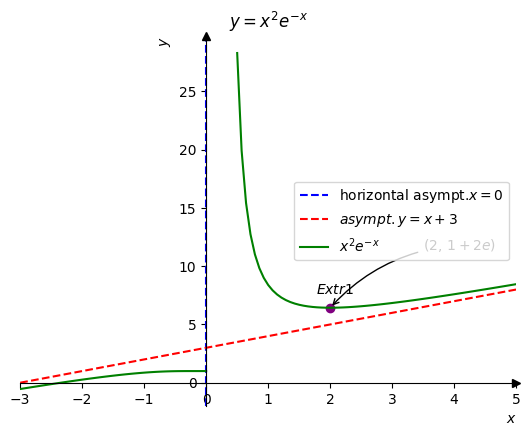

In [14]:
from sympy.abc import x
from sympy.calculus.util import periodicity

X_MIN: float = -3.0
X_MAX: float = 5.0


def config_ax(ax):
    global X_MIN, X_MAX
    ax.set_title("$y = x^2  e^{-x}$")
    ax.legend(loc="right")
    ax.set_xlim(X_MIN, X_MAX)
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["bottom"].set_position(("data", 0))
    ax.spines["left"].set_position(("data", 0))
    ax.set_ylabel("$y$", loc="top")
    ax.set_xlabel("$x$", loc="right")
    ax.plot(1, 0, "k>", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)


def annotate_extreme_points(extr_x, extr_y):
    plt.scatter(extr_x, extr_y, color="purple")
    for i, x0 in enumerate(extr_x):
        f0 = extr_y[i]
        plt.annotate(
            fr"$\left({latex(x0)},\,{latex(f0)}\right)$",
            xy=(x0, f0),
            xycoords="data",
            xytext=(x0 + 1.5, f0 + 5),
            textcoords="data",
            arrowprops={
                "arrowstyle": "->",
                "connectionstyle": "arc3,rad=.2",
            }
        )
        plt.annotate(
            f"$Extr{i + 1}$",
            xy=(x0, f0),
            xycoords="data",
            xytext=(-10, 10),
            textcoords="offset points",
            fontsize=10,
        )
    

def annotate_inflection_points(infl_x, infl_y):
    plt.scatter(infl_x, infl_y, color="blue")
    for i, x0 in enumerate(infl_x):
        f0 = infl_y[i]
        plt.annotate(
                fr"$\left({latex(x0)},\,{latex(f0)}\right)$", 
                xy=(x0, f0), 
                xycoords="data",
                xytext=(x0 + 0.9, f0), 
                textcoords="data", 
                fontsize=10,
                arrowprops={
                    "arrowstyle": "->", 
                    "connectionstyle": "arc3,rad=.2",
                })
        plt.annotate(
            f"$Inflect{i+1}$", 
            xy=(x0, f0), 
            xycoords="data",
            xytext=(-10, 10), 
            textcoords="offset points", 
            fontsize=10
        )


def f(x):
    return x*sympy.E**(2/x) + 1


def main():
    domain_f = continuous_domain(f(x), x, domain=S.Reals)
    print("Область определения функции:")
    display(domain_f)

    period = periodicity(f(x), x)
    if period:
        print("Периодичность функции:")
        display(period)
    else:
        print("Функция не периодична\n")

    if f(x) == f(-x):
        print("Функция чётна\n")
    elif f(x) == -f(-x):
        print("Функия нечётна\n")
    else:
        print("Функция общего вида\n")

    df_x = f(x).diff(x)
    print("Производная первого порядка:")
    display(df_x)
    df_roots = sorted(solve(df_x, x))
    if df_roots:
        print("Нули производной:")
        display(df_roots)

        points = [df_roots[0] - 1] + \
                [(df_roots[i] + df_roots[i + 1]) / 2 for i in range(len(df_roots) - 1)] + \
                [df_roots[-1] + 1]
        df_points = [df_x.subs(x, point) for point in points]
        print("Значения производной около нулей:")
        display(df_points)

        extreme_points = [root for i, root in enumerate(df_roots) if df_points[i] * df_points[i+1] < 0]
        print("Точки экстремума функции:")
        display(extreme_points)
        annotate_extreme_points(extreme_points, [f(p) for p in extreme_points])
    else:
        print("Производная не обращается в ноль")
    
    df2_x = f(x).diff(x, 2)
    print("Производная второго порядка:")
    display(df2_x)
    df2_roots = sorted(solve(df2_x, x))
    if df2_roots:
        print("Нули производной второго порядка:")
        display(df2_roots)

        points_2 = [df2_roots[0] - 1] + \
                [(df2_roots[i] + df2_roots[i + 1]) / 2 for i in range(len(df2_roots) - 1)] + \
                [df2_roots[-1] + 1]
        df2_points = [df2_x.subs(x, point) for point in points_2]
        print("Значения производной второго порядка около нулей:")
        display(df2_points)

        inflection_poins = [root for i, root in enumerate(df2_roots) if df2_points[i] * df2_points[i+1] < 0]
        print("Точки перегиба:")
        display(inflection_poins)
        annotate_inflection_points(inflection_poins, [f(p) for p in inflection_poins])
    else:
        print("Произодная второго порядка не обращается в ноль\n")

    
    vert_asymptote = f(x).limit(x, 0)
    if vert_asymptote is not sympy.nan:
        print("Есть вериткальная асимптота при x = 0\n")
        plt.axvline(x=0, color="blue", linestyle="--", label="horizontal asympt.$x = 0$")   
    else:
        print("Вертикальные асимптоты отсутствуют\n")
    
    lim_neg = f(x).limit(x, -sympy.oo)
    print("lim f(x) при x -> -oo:")
    display(lim_neg)
    lim_pos = f(x).limit(x, +sympy.oo)
    print("lim f(x) при x -> +oo:")
    display(lim_pos)
    print("Горизонтальная асимптота:")
    print(f"y = {lim_pos}\n")
    
    k_neg = sympy.limit(f(x)/x, x, -sympy.oo)
    print("k при x -> -oo:")
    display(k_neg)
    k_pos = sympy.limit(f(x)/x, x, +sympy.oo)
    print("k при x -> +oo:")
    display(k_pos)
    
    k = k_pos if k_pos == k_neg else (k_neg, k_pos)
    b = sympy.limit(f(x) - k*x, x, sympy.oo)
    print("b при x -> oo")
    display(b)
    if k and b:
        y_asympy = k*x + b
        plt.plot(
            [X_MIN, X_MAX], 
            [y_asympy.subs(x, X_MIN), y_asympy.subs(x, X_MAX)], 
            "r--", 
            label=fr"$asympt. y = {sympy.latex(y_asympy)}$"
        )

    x_space_1 = np.linspace(X_MIN, -0.001, 64)
    x_space_2 = np.linspace(0.5, X_MAX, 64)

    plt.plot(
        x_space_1, 
        f(x_space_1),
        color='g',
        label="$x^2  e^{-x}$",
    )
    plt.plot(
        x_space_2, 
        f(x_space_2),
        color='g',
    )
    
    config_ax(plt.gca())


if __name__ == "__main__":
    main()

## Индивидуальное задание
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот (если есть), отметить и подписать точки экстремума и точки перегиба (если есть),
включить функцию и асимптоты (если есть) в легенду. 

$$
f(x) = (2x + 3) e^{6/x} + 1
$$

Область определения функции:


Union(Interval.open(-oo, 0), Interval.open(0, oo))

Функция не периодична

Функция общего вида

Производная первого порядка:


2*exp(6/x) - 6*(2*x + 3)*exp(6/x)/x**2

Нули производной:


[3 - 3*sqrt(2), 3 + 3*sqrt(2)]

Значения производной около нулей:


[-6*(7 - 6*sqrt(2))*exp(6/(2 - 3*sqrt(2)))/(2 - 3*sqrt(2))**2 + 2*exp(6/(2 - 3*sqrt(2))),
 -4*exp(2),
 -6*(6*sqrt(2) + 11)*exp(6/(4 + 3*sqrt(2)))/(4 + 3*sqrt(2))**2 + 2*exp(6/(4 + 3*sqrt(2)))]

Точки экстремума функции:


[3 - 3*sqrt(2), 3 + 3*sqrt(2)]

Производная второго порядка:


12*(-2 + (2*x + 3)/x + 3*(2*x + 3)/x**2)*exp(6/x)/x**2

Нули производной второго порядка:


[-1]

Значения производной второго порядка около нулей:


[-27*exp(-3)/4, 1.35670477910103e+32]

Точки перегиба:


[-1]

Есть вериткальная асимптота при x = 0

lim f(x) при x -> -oo:


-oo

lim f(x) при x -> +oo:


oo

Горизонтальная асимптота:
y = oo

k при x -> -oo:


2

k при x -> +oo:


2

b при x -> oo


16

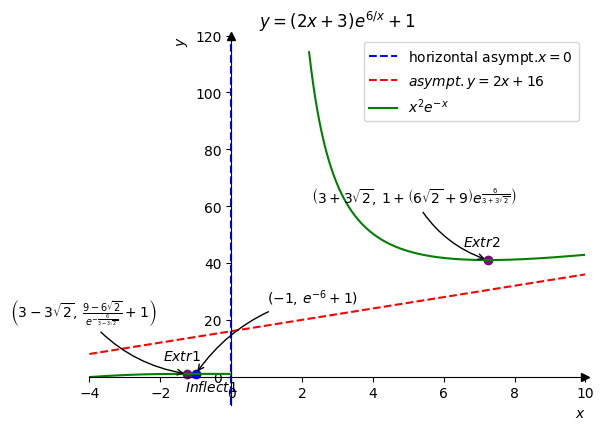

In [19]:
X_MIN = -4.0
X_MAX = 10.0

def config_ax(ax):
    global X_MIN, X_MAX
    ax.set_title("$y = (2x + 3) e^{6/x} + 1$")
    ax.legend(loc="upper right")
    ax.set_xlim(X_MIN, X_MAX)
    ax.set_ylim(-10, 120)
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["bottom"].set_position(("data", 0))
    ax.spines["left"].set_position(("data", 0))
    ax.set_ylabel("$y$", loc="top")
    ax.set_xlabel("$x$", loc="right")
    ax.plot(1, 0, "k>", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)


def annotate_extreme_points(extr_x, extr_y):
    plt.scatter(extr_x, extr_y, color="purple")
    for i, x0 in enumerate(extr_x):
        f0 = extr_y[i]
        plt.annotate(
            fr"$\left({latex(x0)},\,{latex(f0)}\right)$",
            xy=(x0, f0),
            xycoords="data",
            xytext=(x0 - 4, f0 + 20),
            textcoords="data",
            arrowprops={
                "arrowstyle": "->",
                "connectionstyle": "arc3,rad=.2",
            }
        )
        plt.annotate(
            f"$Extr{i + 1}$",
            xy=(x0 - 0.3, f0),
            xycoords="data",
            xytext=(-10, 10),
            textcoords="offset points",
            fontsize=10,
        )
    

def annotate_inflection_points(infl_x, infl_y):
    plt.scatter(infl_x, infl_y, color="blue")
    for i, x0 in enumerate(infl_x):
        f0 = infl_y[i]
        plt.annotate(
                fr"$\left({latex(x0)},\,{latex(f0)}\right)$", 
                xy=(x0, f0), 
                xycoords="data",
                xytext=(x0 + 2, f0 + 25), 
                textcoords="data", 
                fontsize=10,
                arrowprops={
                    "arrowstyle": "->", 
                    "connectionstyle": "arc3,rad=.2",
                })
        plt.annotate(
            f"$Inflect{i+1}$", 
            xy=(x0 - 0.1, f0 - 11), 
            xycoords="data",
            xytext=(-10, 10), 
            textcoords="offset points", 
            fontsize=10
        )


def f(x):
    return (2*x + 3)*sympy.E**(6/x) + 1
    

def main():
    domain_f = continuous_domain(f(x), x, domain=S.Reals)
    print("Область определения функции:")
    display(domain_f)

    period = periodicity(f(x), x)
    if period:
        print("Периодичность функции:")
        display(period)
    else:
        print("Функция не периодична\n")

    if f(x) == f(-x):
        print("Функция чётна\n")
    elif f(x) == -f(-x):
        print("Функия нечётна\n")
    else:
        print("Функция общего вида\n")

    df_x = f(x).diff(x)
    print("Производная первого порядка:")
    display(df_x)
    df_roots = sorted(solve(df_x, x))
    if df_roots:
        print("Нули производной:")
        display(df_roots)

        points = [df_roots[0] - 1] + \
                [(df_roots[i] + df_roots[i + 1]) / 2 for i in range(len(df_roots) - 1)] + \
                [df_roots[-1] + 1]
        df_points = [df_x.subs(x, point) for point in points]
        print("Значения производной около нулей:")
        display(df_points)

        extreme_points = [root for i, root in enumerate(df_roots) if df_points[i] * df_points[i+1] < 0]
        print("Точки экстремума функции:")
        display(extreme_points)
        annotate_extreme_points(extreme_points, [f(p) for p in extreme_points])
    else:
        print("Производная не обращается в ноль")
    
    df2_x = f(x).diff(x, 2)
    print("Производная второго порядка:")
    display(df2_x)
    df2_roots = sorted(solve(df2_x, x))
    if df2_roots:
        print("Нули производной второго порядка:")
        display(df2_roots)

        points_2 = [df2_roots[0] - 1] + \
                [(df2_roots[i] + df2_roots[i + 1]) / 2 for i in range(len(df2_roots) - 1)] + \
                [df2_roots[-1] + 1]
        df2_points = [df2_x.subs(x, point) if df2_x.subs(x, point) is not sympy.nan else df2_x.subs(x, point + 0.1) for point in points_2]
        print("Значения производной второго порядка около нулей:")
        display(df2_points)

        inflection_poins = [root for i, root in enumerate(df2_roots) if df2_points[i] * df2_points[i+1] < 0]
        print("Точки перегиба:")
        display(inflection_poins)
        annotate_inflection_points(inflection_poins, [f(p) for p in inflection_poins])
    else:
        print("Произодная второго порядка не обращается в ноль")

    vert_asymptote = f(x).limit(x, 0)
    if vert_asymptote is not sympy.nan:
        print("Есть вериткальная асимптота при x = 0\n")
        plt.axvline(x=0, color="blue", linestyle="--", label="horizontal asympt.$x = 0$")   
    else:
        print("Вертикальные асимптоты отсутствуют\n")
    
    lim_neg = f(x).limit(x, -sympy.oo)
    print("lim f(x) при x -> -oo:")
    display(lim_neg)
    lim_pos = f(x).limit(x, +sympy.oo)
    print("lim f(x) при x -> +oo:")
    display(lim_pos)
    print("Горизонтальная асимптота:")
    print(f"y = {lim_pos}\n")
    
    k_neg = sympy.limit(f(x)/x, x, -sympy.oo)
    print("k при x -> -oo:")
    display(k_neg)
    k_pos = sympy.limit(f(x)/x, x, +sympy.oo)
    print("k при x -> +oo:")
    display(k_pos)
    
    k = k_pos if k_pos == k_neg else (k_neg, k_pos)
    b = sympy.limit(f(x) - k*x, x, sympy.oo)
    print("b при x -> oo")
    display(b)
    if k and b:
        y_asympy = k*x + b
        plt.plot(
            [X_MIN, X_MAX], 
            [y_asympy.subs(x, X_MIN), y_asympy.subs(x, X_MAX)], 
            "r--", 
            label=fr"$asympt. y = {sympy.latex(y_asympy)}$"
        )

    
    x_space_1 = np.linspace(X_MIN, -0.001, 128)
    x_space_2 = np.linspace(2.2, X_MAX, 128)

    plt.plot(
        x_space_1, 
        f(x_space_1),
        color='g',
        label="$x^2  e^{-x}$",
    )
    plt.plot(
        x_space_2, 
        f(x_space_2),
        color='g',
    )

    config_ax(plt.gca())


if __name__ == "__main__":
    main()